<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [ ]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries
df['salary'].mean()

113706.45843828715

In [ ]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [ ]:
# Creating new dataframe with 'sex' and 'salary' column
new_df = df[['sex','salary']]
new_df

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [ ]:
new_df[(new_df['sex']=='Male')]['salary'].median()

108043.0

In [ ]:
# More readable code.
male_df = new_df[(new_df['sex']=='Male')]
male_df['salary'].median()

108043.0

Finding the Median salary for all females

In [ ]:
new_df[(new_df['sex']=='Female')]['salary'].median()

103750.0

In [ ]:
# More readable code.
male_df = new_df[(new_df['sex']=='Female')]
male_df['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [ ]:
male_mean_salary = new_df[(new_df['sex']=='Male')]['salary'].mean()
male_mean_salary

115090.41899441341

In [ ]:
female_mean_salary = new_df[(new_df['sex']=='Female')]['salary'].mean()
female_mean_salary

101002.41025641025

In [ ]:
# The difference between mean salaries of male and female
mean_salary_difference = male_mean_salary - female_mean_salary
mean_salary_difference

14088.008738003162

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
# Get the data with 20 plus years of service.
df_20_years = df[(df['yrs.service']>=20)]

In [ ]:
# Check number of employees. 157 rows = 157 employees.
df_20_years.shape

(157, 7)

In [ ]:
# Get the mean of the salary.
df_20_years['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
# Get the data with less than 20 years of service.
df_less_20 = df[(df['yrs.service']<20)]

# Get the mean salary.
df_less_20['salary'].mean()

107940.50416666667

In [ ]:
# Getting the difference
df_20_years['salary'].mean() - df_less_20['salary'].mean()

14580.151884288745

People who have salary of greater than or equal to 200,000

In [ ]:
# Get the data with salary >= 200k
df[(df['salary']>=200000)]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


In [ ]:
df[(df['salary']>=200000)].shape

(3, 7)

### Findings:
1. The median salary for all male is $\$108,043.00$, compared to $\$103,750.00$ from females.
2. The difference between the mean average salaries of male and female is $\$14,088.01$
3. People who have 20 or more years of experience have a mean average salary of $\$122,520.66$ while people with less than 20 years of experience have $\$107,940.50$ with a difference of $\$14,580.15$.
4. There are only three people who earns more than $\$200000$.



# Rename values, subset columns, etc

In [ ]:
# Changing column Unnamed: 0 to ID
df = df.rename(columns={'Unnamed: 0': 'ID'})
df.head()

,ID,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
# Fixing the column names
df = df.rename(columns={'rank': 'Rank'})
df = df.rename(columns={'discipline': 'Discipline'})
df = df.rename(columns={'yrs.since.phd': 'Years since Phd'})
df = df.rename(columns={'yrs.service': 'Years of Service'})
df = df.rename(columns={'sex': 'Sex'})
df = df.rename(columns={'salary': 'Salary'})
df.head()

,ID,Rank,Discipline,Years since Phd,Years of Service,Sex,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


# Create some simple visualizations showing some simple statistics

Text(0, 0.5, 'Individuals')

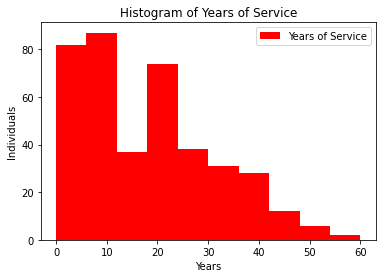

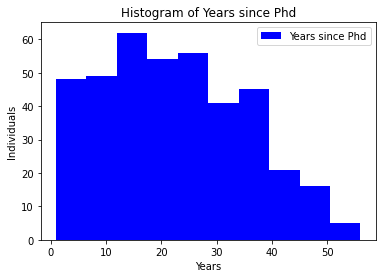

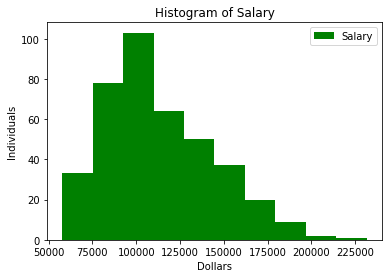

In [ ]:
# Checking the histograms in terms of years of service, years since phd, and salary.
df.plot(kind='hist',y='Years of Service',color='red', layout=(2,1))
plt.title('Histogram of Years of Service')
plt.xlabel('Years')
plt.ylabel('Individuals')

df.plot(kind='hist', y='Years since Phd', color='blue')
plt.title('Histogram of Years since Phd')
plt.xlabel('Years')
plt.ylabel('Individuals')

df.plot(kind='hist', y='Salary', color='green')
plt.title('Histogram of Salary')
plt.xlabel('Dollars')
plt.ylabel('Individuals')

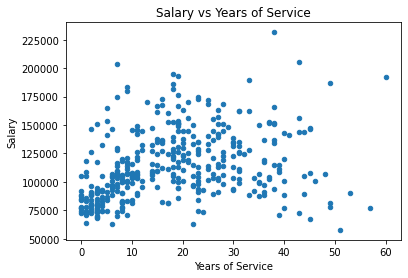

In [ ]:
# The relationship between years of service and salary
df.plot(kind='scatter', x='Years of Service', y='Salary', title='Salary vs Years of Service')

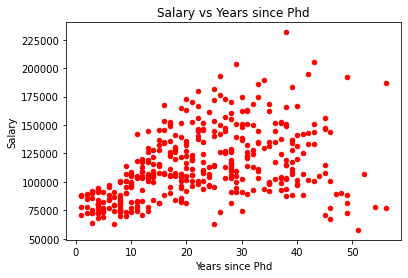

In [ ]:
# The relationship between years since phd and salary
df.plot(kind='scatter', x='Years since Phd', y='Salary', color='red', title='Salary vs Years since Phd')

In [ ]:
# Using seaborn library for a much better visualization.
import seaborn as sb

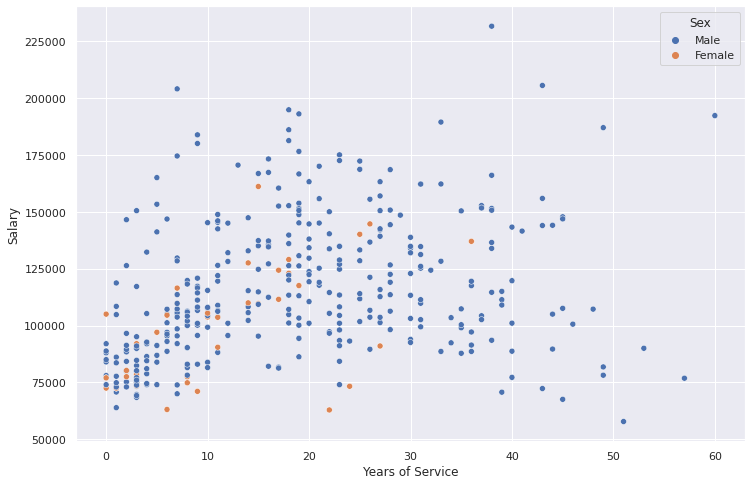

In [ ]:
# Scatterplot
sb.scatterplot(data=df, x='Years of Service', y='Salary', hue='Sex')

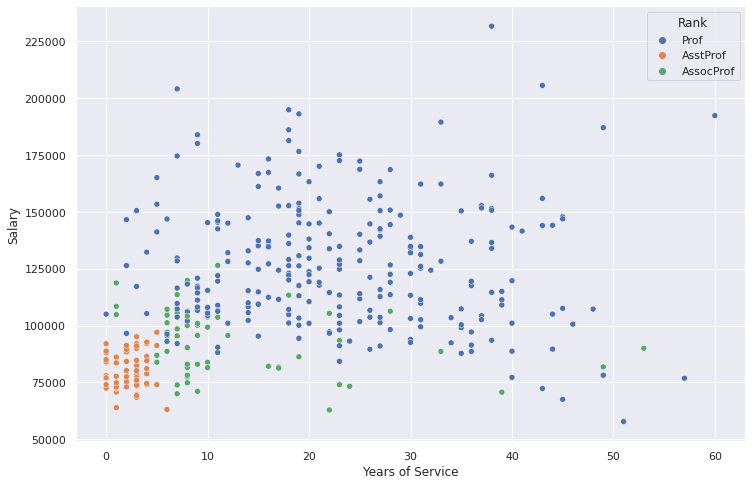

In [ ]:
sb.scatterplot(data=df, x='Years of Service', y='Salary', hue='Rank')

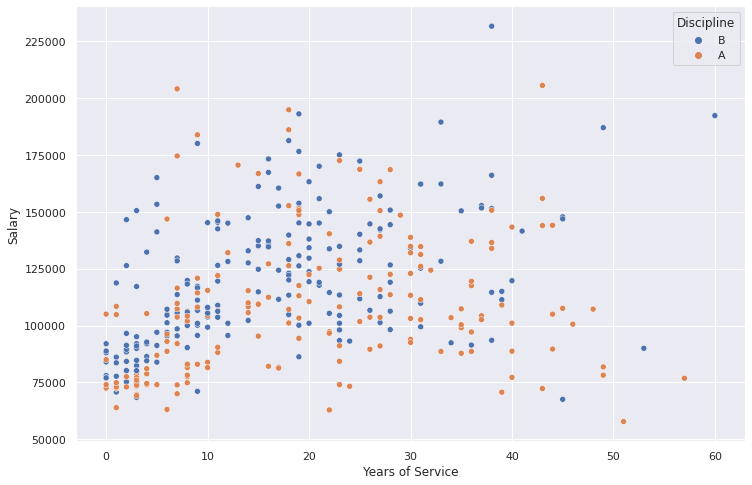

In [ ]:
sb.scatterplot(data=df, x='Years of Service', y='Salary', hue='Discipline')

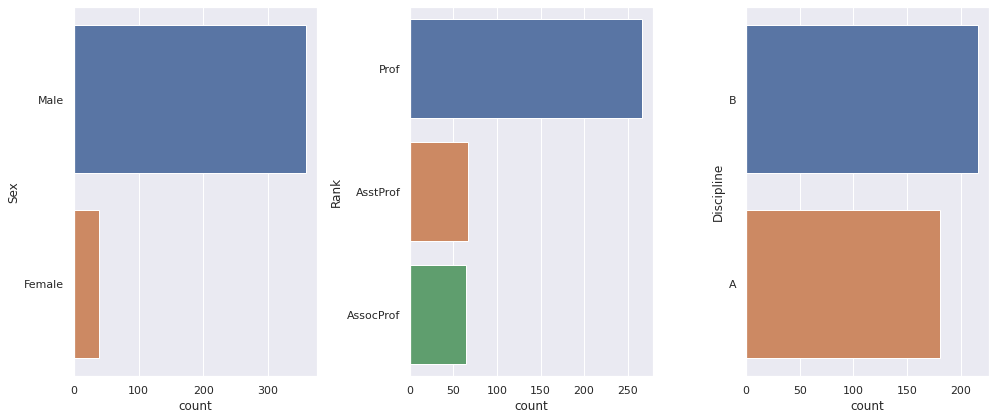

In [ ]:
# Difference with the number of individuals based on non-numeric labels
f, axes = plt.subplots(1, 3, figsize=(14,6))
sb.countplot(y='Sex', data=df, ax = axes[0])
sb.countplot(y='Rank', data=df, ax= axes[1])
sb.countplot(y='Discipline', data=df, ax= axes[2])
f.tight_layout()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

There are a lot of professors with less than 30 years of service. It also shows that there is a correlation between years of service and salary. The rank of the professors matters a lot when it comes to salary. The assistant professors made less compared to others since they also have the least amount of years of service. Professors have higher average salary compared to assistant and associate professors. The split between the discipline is also a fairly even, which shows that it has a very little effect on the salary of the professors.

I also discovered that the number of female professors are much less compared to male professors. Since we only have a few data about female professors and they are mostly under 30 years of service, we can not say that being a female relates to salary.


